In [ ]:
from google.colab import drive
drive.mount("/content/gdrive")
%cd '/content/gdrive/MyDrive/LDS6_S7N_TranHoangBach/BaiTap/Chapter_13_Apriori'

Mounted at /content/gdrive
/content/gdrive/MyDrive/LDS6_S7N_TranHoangBach/BaiTap/Chapter_13_Apriori


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline

from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori

In [ ]:
data = pd.read_csv('store_data.csv', header=None)
data

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,low fat yogurt,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach,olive oil
1,burgers,meatballs,eggs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,chutney,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,turkey,avocado,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,mineral water,milk,energy bar,whole wheat rice,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7496,butter,light mayo,fresh bread,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7497,burgers,frozen vegetables,eggs,french fries,magazines,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7498,chicken,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7499,escalope,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
records = data.T.apply(lambda x: x.dropna().tolist()).tolist()
trans_enc = TransactionEncoder()
data_transformed = trans_enc.fit(records).transform(records)
df = pd.DataFrame(data_transformed, columns=trans_enc.columns_)
df

,asparagus,almonds,antioxydant juice,asparagus,avocado,babies food,bacon,barbecue sauce,black tea,blueberries,body spray,bramble,brownies,bug spray,burger sauce,burgers,butter,cake,candy bars,carrots,cauliflower,cereals,champagne,chicken,chili,chocolate,chocolate bread,chutney,cider,clothes accessories,cookies,cooking oil,corn,cottage cheese,cream,dessert wine,eggplant,eggs,energy bar,energy drink,...,oil,olive oil,pancakes,parmesan cheese,pasta,pepper,pet food,pickles,protein bar,red wine,rice,salad,salmon,salt,sandwich,shallot,shampoo,shrimp,soda,soup,spaghetti,sparkling water,spinach,strawberries,strong cheese,tea,tomato juice,tomato sauce,tomatoes,toothpaste,turkey,vegetables mix,water spray,white wine,whole weat flour,whole wheat pasta,whole wheat rice,yams,yogurt cake,zucchini
0,False,True,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,...,False,True,False,False,False,False,False,False,False,False,False,True,True,False,False,False,False,True,False,False,False,False,True,False,False,False,True,False,False,False,False,True,False,False,True,False,False,True,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7496,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False

In [ ]:
from mlxtend.frequent_patterns import apriori
frequent_itemsets = apriori(df, min_support=0.05, use_colnames=True).sort_values('support', ascending=False)
frequent_itemsets

,support,itemsets
16,0.238368,(mineral water)
6,0.179709,(eggs)
21,0.174110,(spaghetti)
8,0.170911,(french fries)
3,0.163845,(chocolate)
12,0.132116,(green tea)
15,0.129583,(milk)
13,0.098254,(ground beef)
10,0.095321,(frozen vegetables)
18,0.095054,(pancakes)


In [125]:
from mlxtend.frequent_patterns import association_rules
frequent_itemsets = apriori(df, min_support=0.02, use_colnames=True).sort_values('support', ascending=False)
rules = association_rules(frequent_itemsets, metric='confidence', min_threshold=0.03).sort_values('lift', ascending=False).iloc[:20, :]
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
10,(spaghetti),(ground beef),0.174110,0.098254,0.039195,0.225115,2.291162,0.022088,1.163716
11,(ground beef),(spaghetti),0.098254,0.174110,0.039195,0.398915,2.291162,0.022088,1.373997
73,(olive oil),(spaghetti),0.065858,0.174110,0.022930,0.348178,1.999758,0.011464,1.267048
72,(spaghetti),(olive oil),0.174110,0.065858,0.022930,0.131700,1.999758,0.011464,1.075829
69,(mineral water),(soup),0.238368,0.050527,0.023064,0.096756,1.914955,0.011020,1.051182
68,(soup),(mineral water),0.050527,0.238368,0.023064,0.456464,1.914955,0.011020,1.401255
62,(frozen vegetables),(milk),0.095321,0.129583,0.023597,0.247552,1.910382,0.011245,1.156781
63,(milk),(frozen vegetables),0.129583,0.095321,0.023597,0.182099,1.910382,0.011245,1.106099
36,(eggs),(burgers),0.179709,0.087188,0.028796,0.160237,1.837830,0.013128,1.086988
37,(burgers),(eggs),0.087188,0.179709,0.028796,0.330275,1.837830,0.013128,1.224818


In [126]:
rules[rules['antecedents'].apply(lambda x: 'milk' in x)].head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
63,(milk),(frozen vegetables),0.129583,0.095321,0.023597,0.182099,1.910382,0.011245,1.106099
79,(milk),(ground beef),0.129583,0.098254,0.021997,0.169753,1.727704,0.009265,1.086118


No handles with labels found to put in legend.


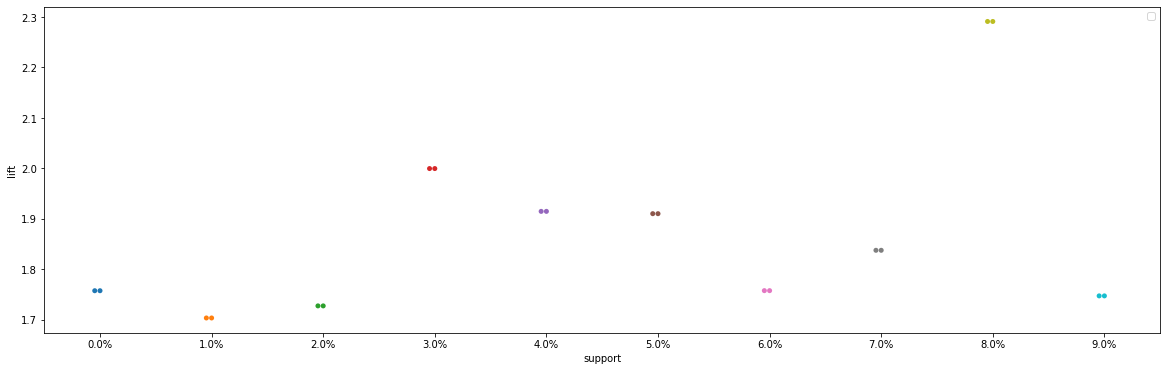

In [ ]:
from matplotlib.ticker import PercentFormatter
plt.figure(figsize=(20,6))
sb.swarmplot(data=rules, x='support', y='lift')
plt.legend()
plt.gca().xaxis.set_major_formatter(PercentFormatter(decimals=1))

In [ ]:
a = rules[['antecedents', 'consequents']].values.tolist()
a = [list(x) for x in a]
a = np.array(a).flatten()
a

array([frozenset({'spaghetti'}), frozenset({'mineral water'}),
       frozenset({'mineral water'}), frozenset({'spaghetti'}),
       frozenset({'chocolate'}), frozenset({'mineral water'}),
       frozenset({'mineral water'}), frozenset({'chocolate'}),
       frozenset({'eggs'}), frozenset({'mineral water'}),
       frozenset({'mineral water'}), frozenset({'eggs'})], dtype=object)